In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import numpy
import sklearn
#from sklearn import datasets, linear_model, metrics

In [198]:
b = pd.DataFrame.from_csv('../data/raw/blood_train.csv')

In [199]:
b[:5]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [200]:
b.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


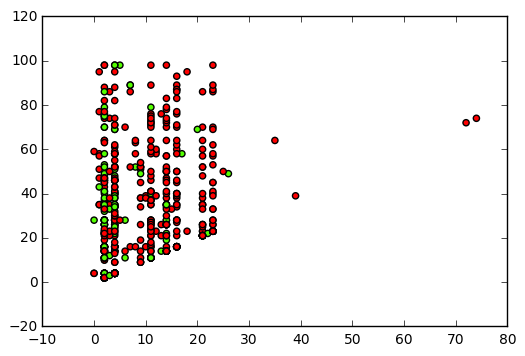

In [201]:
#saving this to remember how to plot inline
%matplotlib inline
plt.scatter(x=b['Months since Last Donation'], y=b['Months since First Donation'], c=b['Made Donation in March 2007'], cmap='prism') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f1e0210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1200a9190>]], dtype=object)

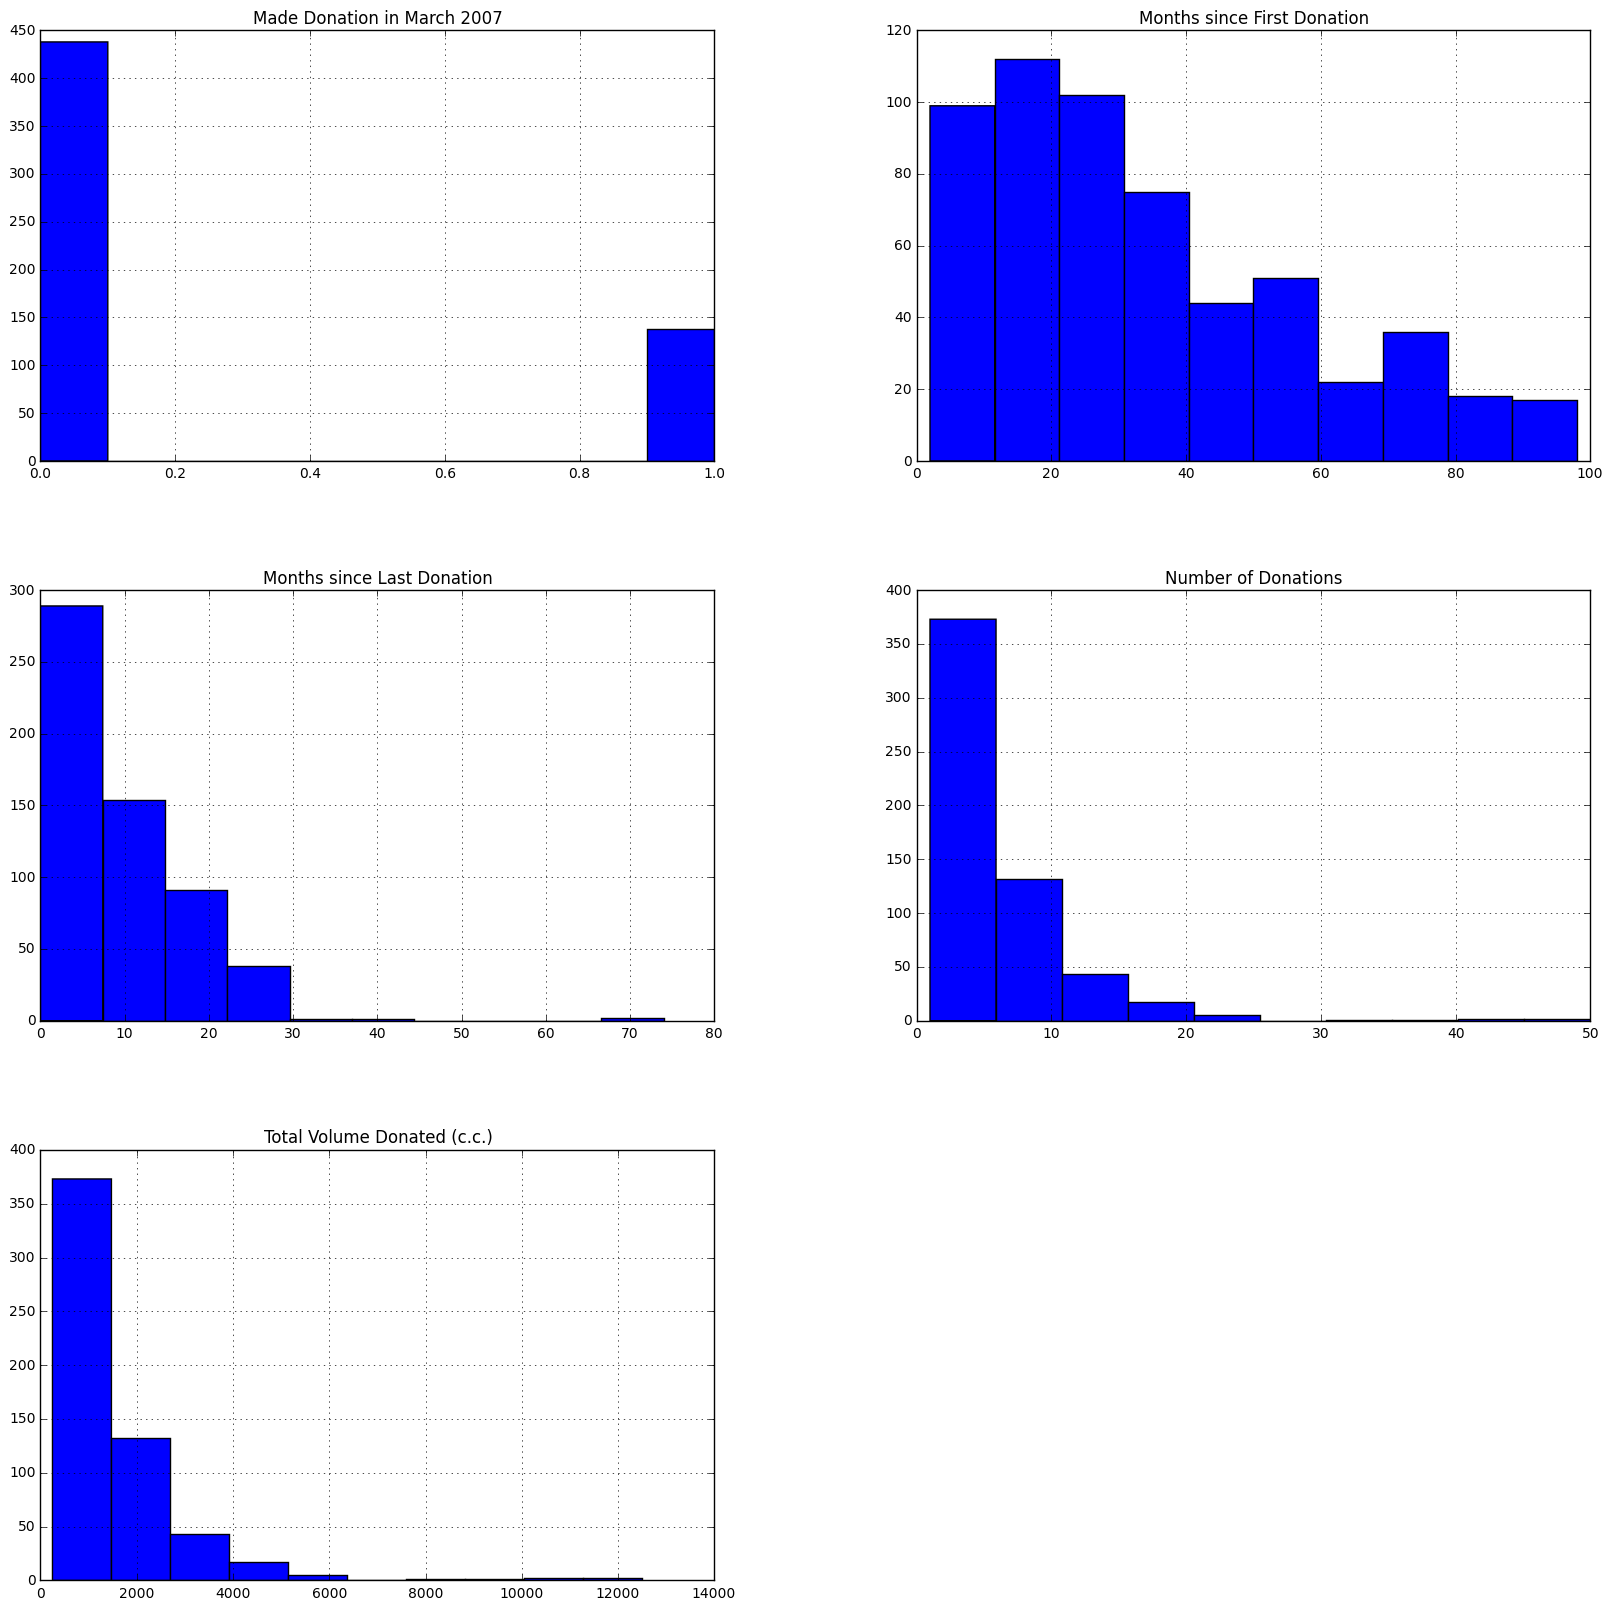

In [202]:
%matplotlib inline
b.hist(figsize=(20,20)) 

In [203]:
b.kurtosis()

Months since Last Donation     11.416687
Number of Donations            18.940493
Total Volume Donated (c.c.)    18.940493
Months since First Donation    -0.192772
Made Donation in March 2007    -0.504993
dtype: float64

In [204]:
b.skew()

Months since Last Donation     2.071107
Number of Donations            3.503331
Total Volume Donated (c.c.)    3.503331
Months since First Donation    0.767706
Made Donation in March 2007    1.223427
dtype: float64

In [205]:
#everything is heavily skewed, well, except months since first donation
#as we have discussed Total Volume Donated (c.c.) is equal to Number of Donations
#in some cases their are major outliers, perhaps we could cap the value at something much lower and set higher values to that
b1 = b[['Months since Last Donation', 'Number of Donations','Months since First Donation',
        'Made Donation in March 2007']]

In [206]:
b1.columns.values

array(['Months since Last Donation', 'Number of Donations',
       'Months since First Donation', 'Made Donation in March 2007'], dtype=object)

In [207]:
b1[b1['Months since Last Donation'] > 30]
#note people with really big last donations it's equal to their first donation, maybe they donated once and then
#were like "I hate this" and never donated again

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
673,35,3,64,0
350,74,1,74,0
541,39,1,39,0
74,72,1,72,0


In [208]:
#b1[(b1['Months since Last Donation']==b1['Months since First Donation'])&(b1['Made Donation in March 2007']==1)]
#.count()

In [209]:
#print float(18)/float(144)

In [210]:
#b1.keys()

In [212]:
b1['Months since Last Donation Outliers Removed'] = b1['Months since Last Donation']
b1.loc[b1['Months since Last Donation'] > 35, 'Months since Last Donation Outliers Removed'] = 35
#b1[b1['Months since Last Donation Outliers Removed'].apply(lambda x: x > 35)] = 35

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  from ipykernel import kernelapp as app


In [213]:
b1[b1['Months since Last Donation Outliers Removed'] > 30]

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Months since Last Donation Outliers Removed
673,35,3,64,0,35
350,74,1,74,0,35
541,39,1,39,0,35
74,72,1,72,0,35


In [214]:
b1[b1['Number of Donations']>30]

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Months since Last Donation Outliers Removed
619,2,50,98,1,2
736,5,46,98,1,5
451,23,38,98,0,23
39,2,43,86,1,2
149,2,44,98,0,2
157,4,33,98,1,4


In [215]:
##okay, need to save this to remember how it works, but sqrt didn't normalize quite as much as I hoped... though way better
b1['Months since Last Donation square root'] = b1['Months since Last Donation Outliers Removed'].apply(math.sqrt)
#b1['Months since Last Donation log'] = (b1['Months since Last Donation']+1).apply(numpy.log)
#b1['Months since Last Donation reciprocal'] = 1/(b1['Months since Last Donation']+1)
#oh yea, log and reciprocal won't work well because there are zeroes, would need to add one to all values before proceeding
#cool, so sqrt wins anyway... 

#b1['Number of Donations square root'] = b1['Number of Donations'].apply(math.sqrt)
b1['Number of Donations log'] = (b1['Number of Donations']+1).apply(numpy.log)
#b1['Number of Donations reciprocal'] = 1/(b1['Number of Donations']+1)
#log wins here

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120089b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121670350>]], dtype=object)

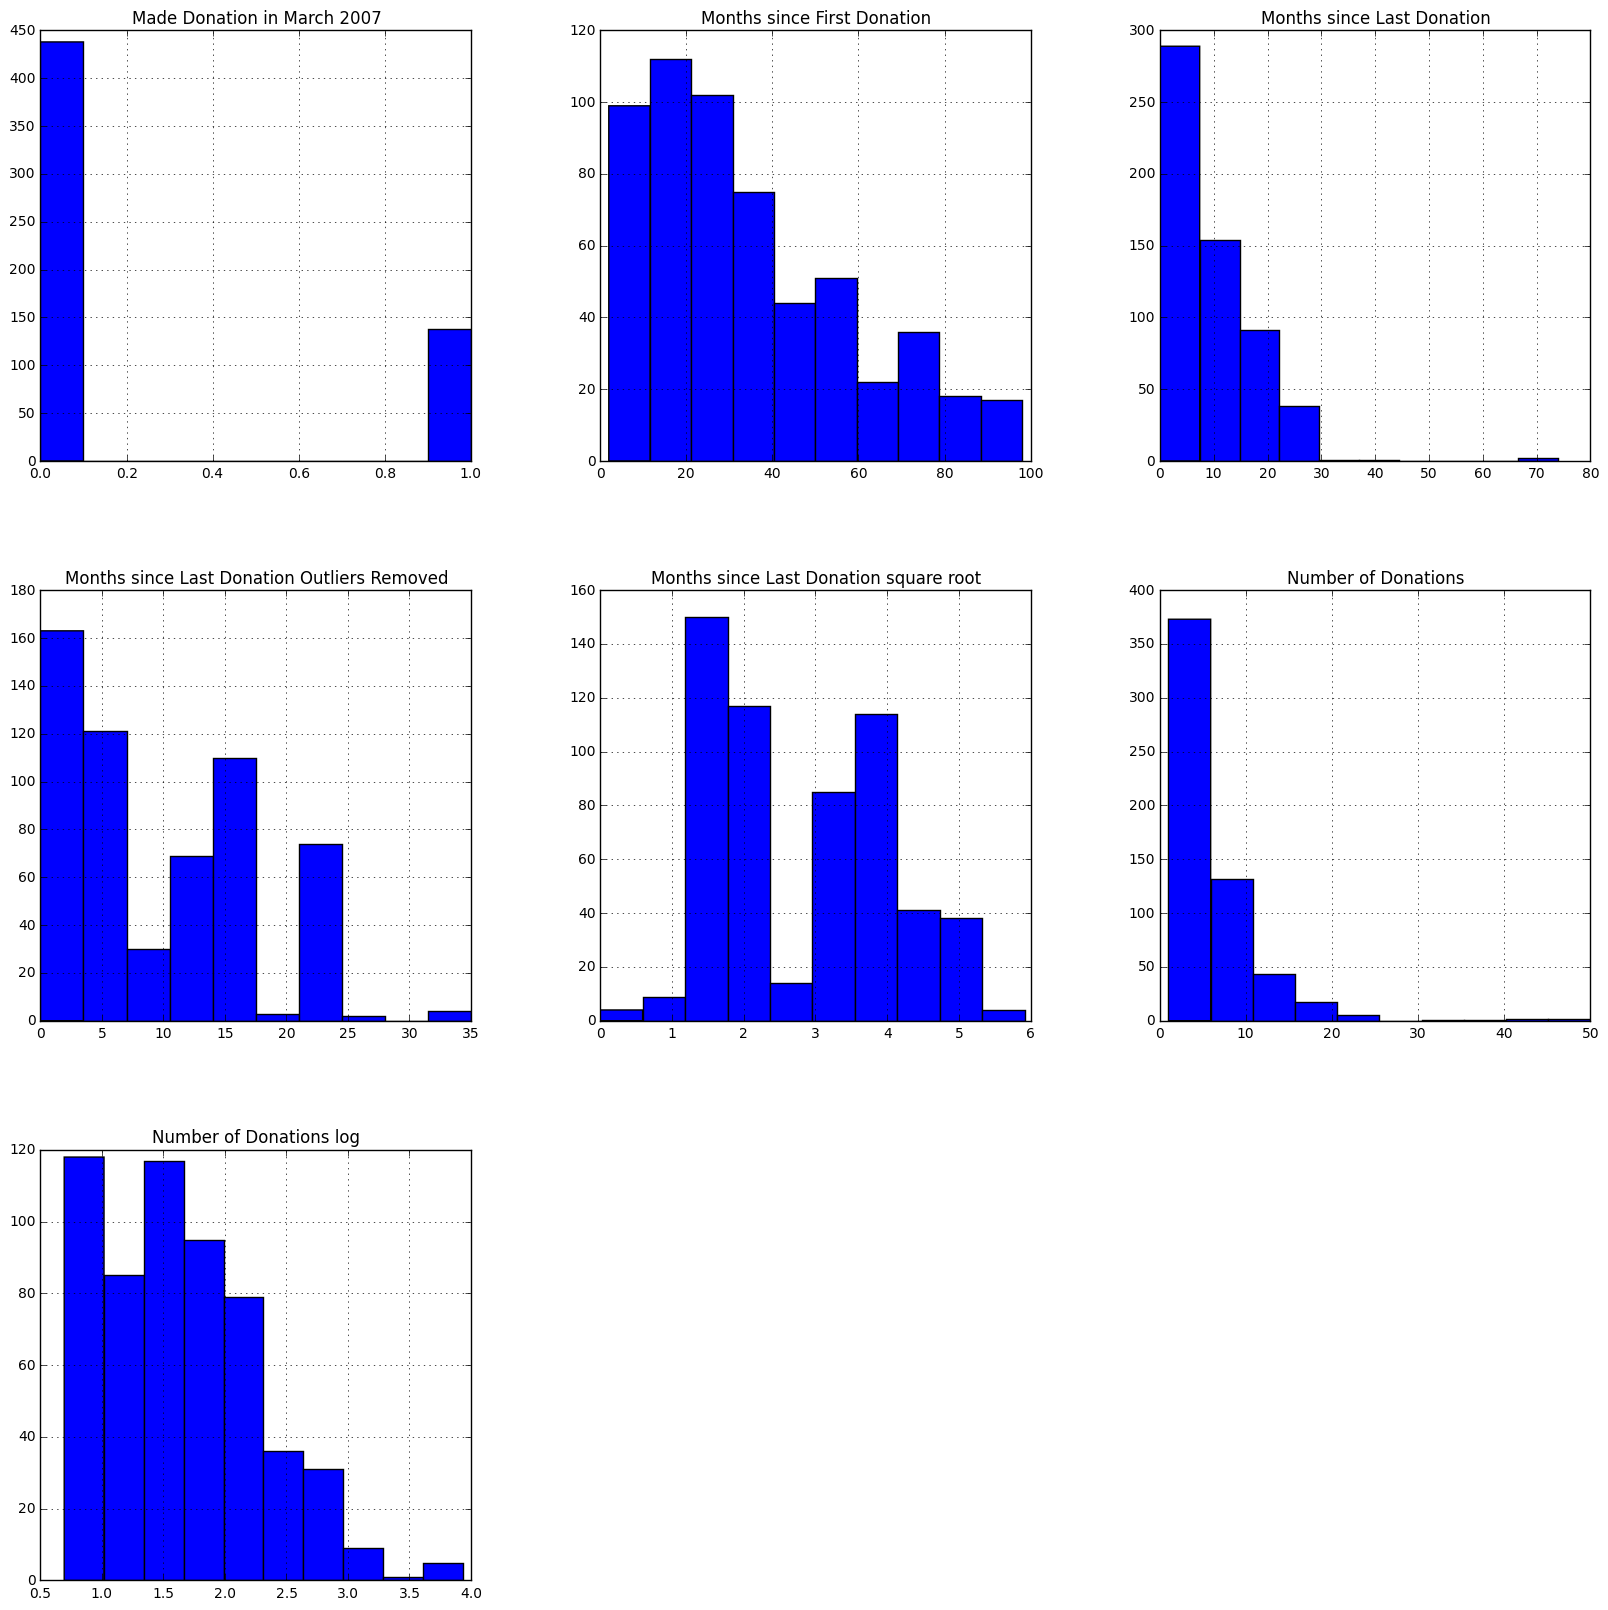

In [216]:
b1.hist(figsize=(20,20))

In [217]:
print "SKEW"
print b1.skew()
print ""
print "KURTOSIS"
print b1.kurtosis()

SKEW
Months since Last Donation                     2.071107
Number of Donations                            3.503331
Months since First Donation                    0.767706
Made Donation in March 2007                    1.223427
Months since Last Donation Outliers Removed    0.742492
Months since Last Donation square root         0.234546
Number of Donations log                        0.446914
dtype: float64

KURTOSIS
Months since Last Donation                     11.416687
Number of Donations                            18.940493
Months since First Donation                    -0.192772
Made Donation in March 2007                    -0.504993
Months since Last Donation Outliers Removed    -0.305992
Months since Last Donation square root         -1.160537
Number of Donations log                        -0.254753
dtype: float64


In [218]:
#also, is there a way to get odds ratios or percent liklihood from logistic regression in python? there is in R so it seems likely...
b1.keys()

Index([u'Months since Last Donation', u'Number of Donations', u'Months since First Donation', u'Made Donation in March 2007', u'Months since Last Donation Outliers Removed', u'Months since Last Donation square root', u'Number of Donations log'], dtype='object')

In [219]:
b2 = b1[['Months since Last Donation square root', 'Number of Donations log', 'Months since First Donation', 'Made Donation in March 2007']]

In [220]:
b2[:5]

,Months since Last Donation square root,Number of Donations log,Months since First Donation,Made Donation in March 2007
619,1.414214,3.931826,98,1
664,0.000000,2.639057,28,1
441,1.000000,2.833213,35,1
160,1.414214,3.044522,45,1
358,1.000000,3.218876,77,0


In [221]:
b2.keys()

Index([u'Months since Last Donation square root', u'Number of Donations log', u'Months since First Donation', u'Made Donation in March 2007'], dtype='object')

In [222]:
pred = b2[['Months since Last Donation square root', 'Number of Donations log', 'Months since First Donation']]
outcomes = b2[['Made Donation in March 2007']]
fit1 = linear_model.LinearRegression()


In [223]:
fit1.fit(pred, outcomes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [224]:
fit2 = linear_model.LogisticRegression()
fit2.fit(pred, outcomes)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [225]:
fit2.coef_

array([[-0.45450825,  1.38811617, -0.02827812]])

In [226]:
v= pd.DataFrame(fit2.predict_proba(pred))


In [227]:
v.describe()

,0,1
count,576.000000,576.000000
mean,0.757990,0.242010
std,0.166845,0.166845
min,0.186097,0.005404
25%,0.651773,0.095229
50%,0.793474,0.206526
75%,0.904771,0.348227
max,0.994596,0.813903


In [228]:
v[:5]

,0,1
0,0.343475,0.656525
1,0.186097,0.813903
2,0.251124,0.748876
3,0.285997,0.714003
4,0.391671,0.608329


In [229]:
bt = pd.DataFrame.from_csv('../data/raw/blood_test.csv')

In [230]:
#need to to do square-rooting and logging and what not
bt[:5]
#could just redo by hand, or make a function that does above?
#vt= pd.DataFrame(fit2.predict_proba(bt))

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [231]:
bt.count()

Months since Last Donation     200
Number of Donations            200
Total Volume Donated (c.c.)    200
Months since First Donation    200
dtype: int64

In [232]:
b2.iloc[1:4, 0:3]

,Months since Last Donation square root,Number of Donations log,Months since First Donation
664,0.000000,2.639057,28
441,1.000000,2.833213,35
160,1.414214,3.044522,45


In [233]:
X = b2.iloc[:,0:3].as_matrix()
y = list(b2["Made Donation in March 2007"])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf   = linear_model.LogisticRegression()
score = sklearn.model_selection.cross_val_score( 
    clf, 
    X, y,
    scoring="neg_log_loss")

print(score)

[-0.57866836 -0.50813732 -0.48442203]


In [234]:
bt[1:5]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [241]:
bt1 = bt[['Months since Last Donation', 'Number of Donations','Months since First Donation']]
bt1['Months since Last Donation Outliers Removed'] = bt1['Months since Last Donation']
bt1.loc[bt1['Months since Last Donation'] > 35, 'Months since Last Donation Outliers Removed'] = 35


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  app.launch_new_instance()


In [242]:
bt1[1:5]

,Months since Last Donation,Number of Donations,Months since First Donation,Months since Last Donation Outliers Removed
276,21,7,38,21
263,4,1,4,4
303,11,11,38,11
83,4,12,34,4


In [243]:
bt1['Months since Last Donation square root'] = bt1['Months since Last Donation Outliers Removed'].apply(math.sqrt)

bt1['Number of Donations log'] = (bt1['Number of Donations']+1).apply(numpy.log)


In [244]:
bt2 = bt1[['Months since Last Donation square root', 'Number of Donations log', 'Months since First Donation']]

In [245]:
bt2[1:5]

,Months since Last Donation square root,Number of Donations log,Months since First Donation
276,4.582576,2.079442,38
263,2.000000,0.693147,4
303,3.316625,2.484907,38
83,2.000000,2.564949,34


In [246]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
clf.predict_proba(bt2)

array([[ 0.48718888,  0.51281112],
       [ 0.84115388,  0.15884612],
       [ 0.81090761,  0.18909239],
       [ 0.62916139,  0.37083861],
       [ 0.42702072,  0.57297928],
       [ 0.28498733,  0.71501267],
       [ 0.70952654,  0.29047346],
       [ 0.92623866,  0.07376134],
       [ 0.98913085,  0.01086915],
       [ 0.9353713 ,  0.0646287 ],
       [ 0.8267581 ,  0.1732419 ],
       [ 0.85447363,  0.14552637],
       [ 0.74721038,  0.25278962],
       [ 0.81090761,  0.18909239],
       [ 0.69128186,  0.30871814],
       [ 0.9048472 ,  0.0951528 ],
       [ 0.71858898,  0.28141102],
       [ 0.5490258 ,  0.4509742 ],
       [ 0.92030364,  0.07969636],
       [ 0.68334093,  0.31665907],
       [ 0.49307267,  0.50692733],
       [ 0.64418143,  0.35581857],
       [ 0.56488066,  0.43511934],
       [ 0.81090761,  0.18909239],
       [ 0.76655514,  0.23344486],
       [ 0.74745776,  0.25254224],
       [ 0.6952517 ,  0.3047483 ],
       [ 0.92623866,  0.07376134],
       [ 0.69700726,

In [248]:
p = clf.predict_proba(bt2)

In [249]:
bt2['Made Donation in March 2007'] = p[:,1]
bt2.head()

,Months since Last Donation square root,Number of Donations log,Months since First Donation,Made Donation in March 2007
659,1.414214,2.564949,52,0.512811
276,4.582576,2.079442,38,0.158846
263,2.000000,0.693147,4,0.189092
303,3.316625,2.484907,38,0.370839
83,2.000000,2.564949,34,0.572979


In [256]:
submit_dir = '../data/processed/'
submit_filename = 'submit_cleaned_logistic_regression.csv'
bt2.to_csv(submit_dir+submit_filename, 
         #  columns =('Unnamed: 0', 'Made Donation in March 2007'), 
           index=True)